## EarthLink

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from aggregators import (
    race, 
    income, 
    redlining, 
    plot_race, 
    bucket_and_bin, 
    speed_breakdown, 
    unserved
)

In [3]:
# inputs
fn_earthlink = '../data/output/speed_price_earthlink.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_el.csv'

In [4]:
el = pd.read_csv(fn_earthlink, compression='gzip')

In [5]:
len(el)

565752

In [6]:
el[['major_city', 'state']].nunique()

major_city    34
state         35
dtype: int64

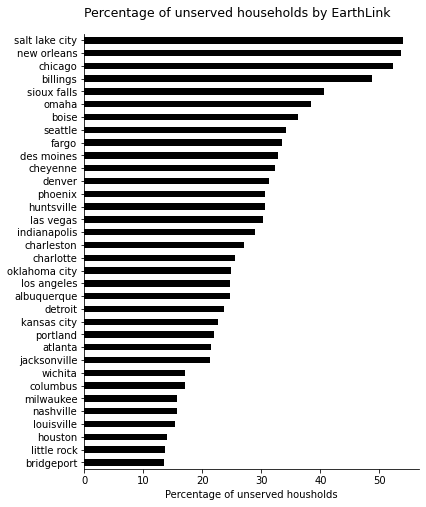

In [7]:
unserved(el, isp='EarthLink', height=8)

In [8]:
# what is the percent of addreses that are not served?
len(el[el.speed_down == 0]) / len(el)

0.28099061072696163

In [9]:
# which ISPs are being leased in each city?
el.groupby(['major_city', 'state']).contract_provider.value_counts()

major_city      state  contract_provider
albuquerque     NM     CenturyLink          10542
atlanta         GA     AT&T                  9208
billings        MT     CenturyLink           1975
boise           ID     CenturyLink           4278
bridgeport      CT     Frontier              3167
                       AT&T                     3
                       CenturyLink              1
charleston      SC     AT&T                  3132
                WV     Frontier              1296
charlotte       NC     AT&T                 15222
cheyenne        WY     CenturyLink           1413
chicago         IL     AT&T                 27829
columbus        OH     AT&T                 22597
denver          CO     CenturyLink          11566
des moines      IA     CenturyLink           4519
detroit         MI     AT&T                 19763
                       CenturyLink              2
fargo           ND     CenturyLink           1630
houston         TX     AT&T                 45981
huntsvill

In [10]:
# throw out Frontier-leased offers and no service
el = el[el['contract_provider'].isin(['AT&T', 'CenturyLink'])]
el = el[el['speed_down'] != 0]
el = el[el.major_city != 'bridgeport']

In [11]:
el.major_city.nunique()

33

In [12]:
len(el)

398401

In [13]:
el = bucket_and_bin(el)

In [14]:
el.speed_down.describe()

count    398401.000000
mean         50.874554
std          40.031391
min           3.000000
25%          12.000000
50%          45.000000
75%         100.000000
max         100.000000
Name: speed_down, dtype: float64

In [15]:
# which cities are mono speed?
variety = el.groupby(['major_city', 'state']).speed_down_bins.value_counts(normalize=True)
to_skip = variety[variety >= .95].index.get_level_values(0)

In [16]:
# who has options?
el[(el['speed_down'] != el['fastest_speed_down']) &
   (~el['fastest_speed_down'].isnull())]['speed_down_bins'].value_counts(normalize=True)

Fast (100-199)     0.559759
Slow (<25 Mbps)    0.439952
Medium (25-99)     0.000289
No service         0.000000
Blazing (≥200)     0.000000
Name: speed_down_bins, dtype: float64

In [17]:
can_upgrade = el[(el['speed_down'] != el['fastest_speed_down']) &
                (~el['fastest_speed_down'].isnull())]

In [18]:
# checking the AT&T pricing abonormalities
el[el.contract_provider == 'AT&T'].price.value_counts(normalize=True)

59.95    0.937083
54.95    0.062917
Name: price, dtype: float64

In [19]:
el[(el.contract_provider == 'AT&T') & 
   (el.price == 54.95)].major_city.value_counts()

columbus     16582
nashville     1409
Name: major_city, dtype: int64

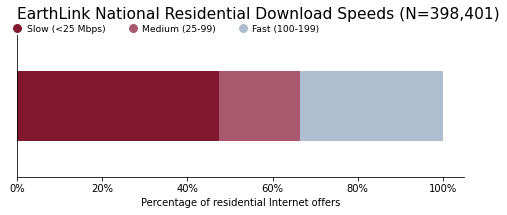

In [20]:
speed_breakdown(el, isp='EarthLink')

In [21]:
# make the above for each city:
city2speeds = pd.DataFrame()
for (city, state), _df in el.groupby(['major_city', 'state']):
    row = _df.speed_down_bins.value_counts(normalize=True, sort=False).to_frame().T
    row.reset_index(drop=True, inplace=True)
    row['major_city'] = city.title()
    row['state'] = state
    city2speeds = city2speeds.append(row)
city2speeds.to_csv(fn_speed, index=False)

<ipython-input-21-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-21-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-21-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-21-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city2speeds = city2speeds.append(row)
<ipython-input-21-678c99dda985>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [22]:
# filter out cities with only slow speeds
el = el[~el.major_city.isin(to_skip)]

In [23]:
len(el), el.major_city.nunique()

(285962, 19)

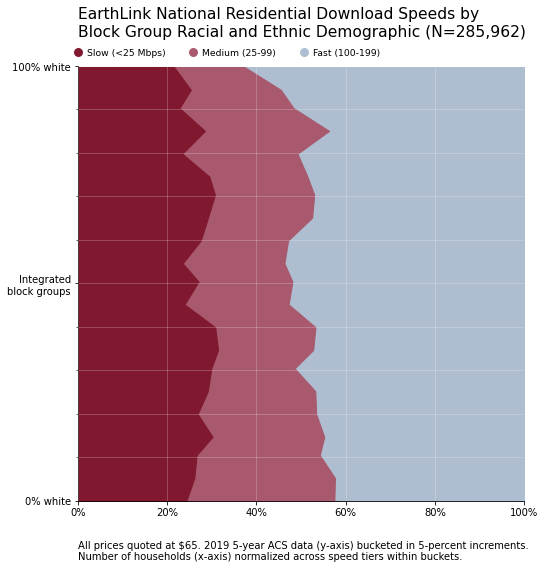

In [24]:
plot_race(el, isp='EarthLink', price='$65')

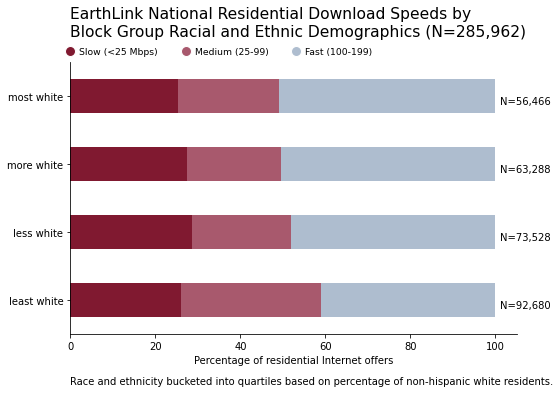

In [25]:
race(el, isp='EarthLink')

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


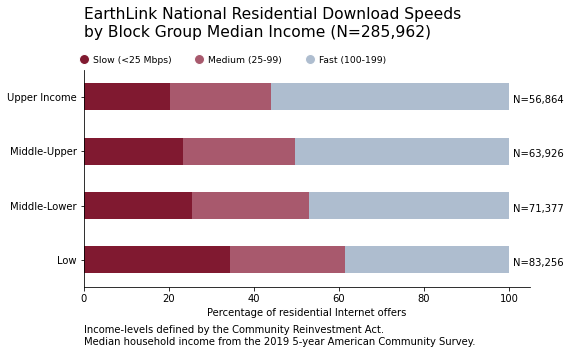

In [26]:
income(el, isp='EarthLink')

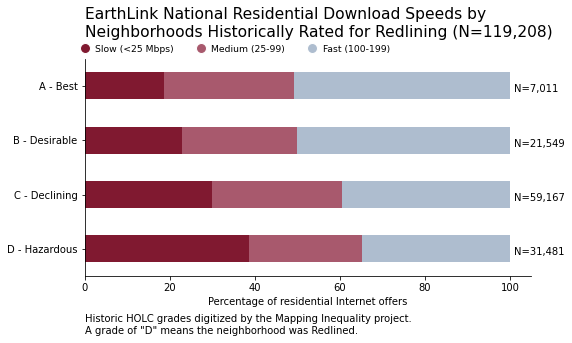

In [27]:
redlining(el, isp='EarthLink')

atlanta GA 9208 AT&T


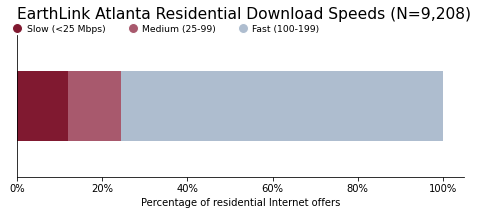

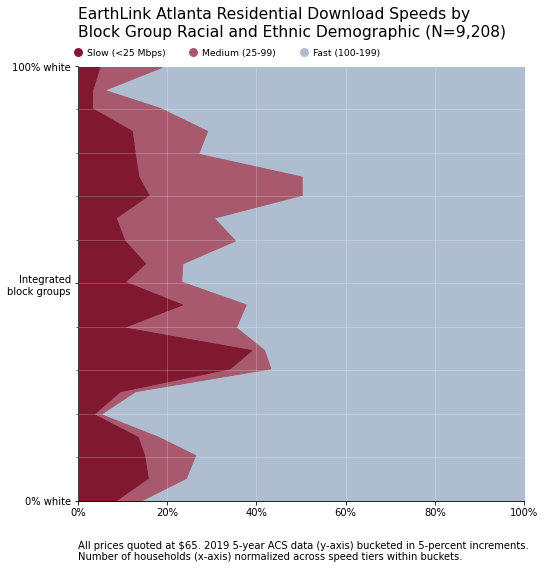

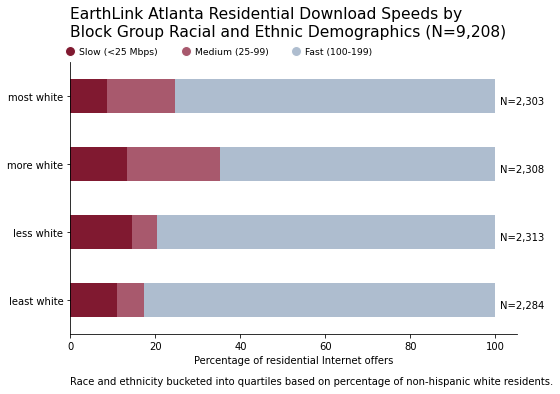

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


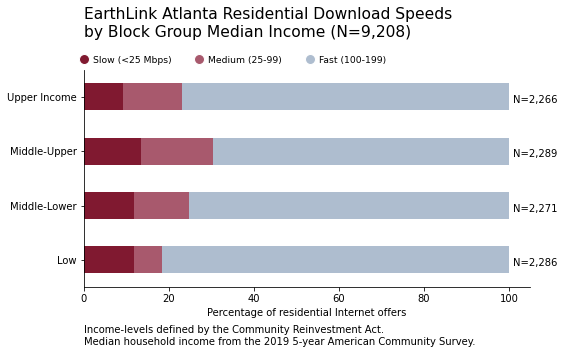

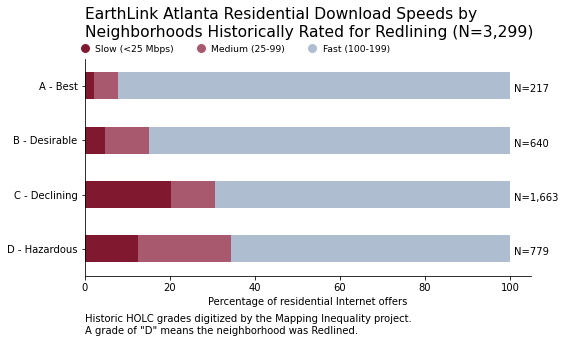

*******************************************************************************
charleston SC 3132 AT&T


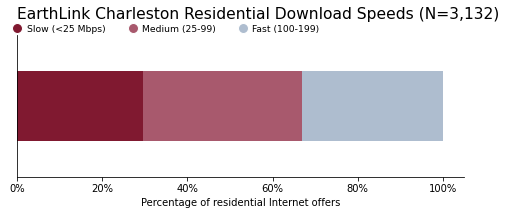

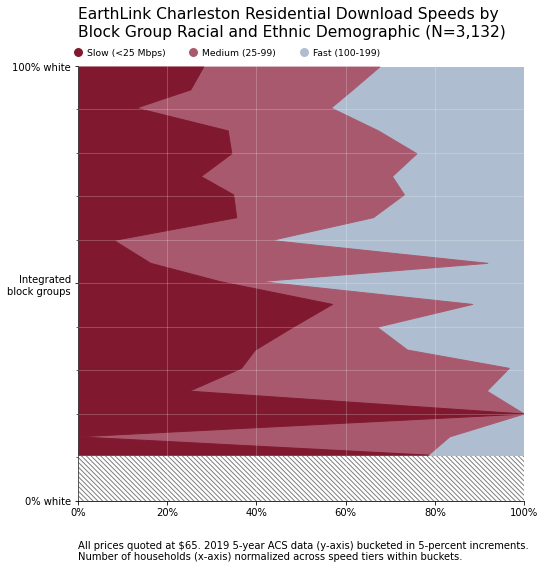

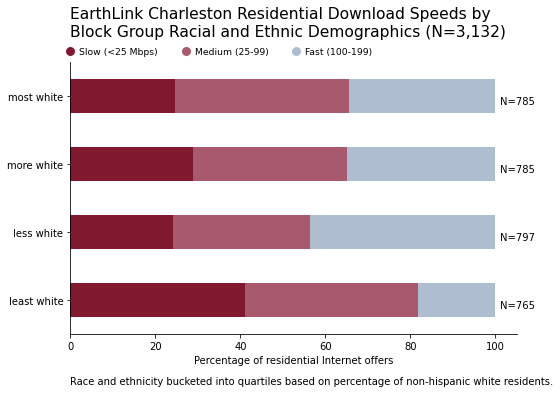

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


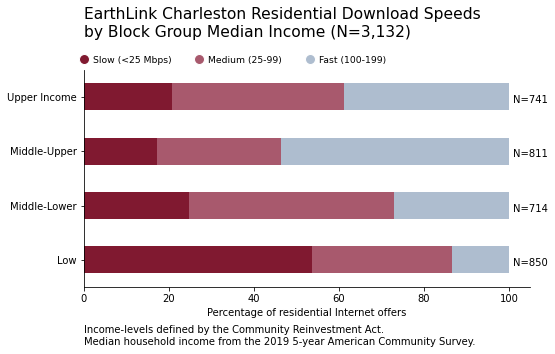

*******************************************************************************
charlotte NC 15222 AT&T


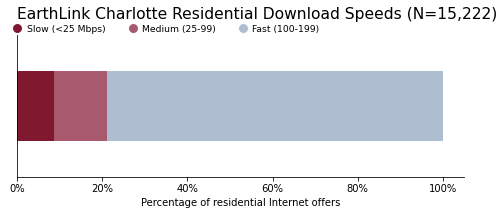

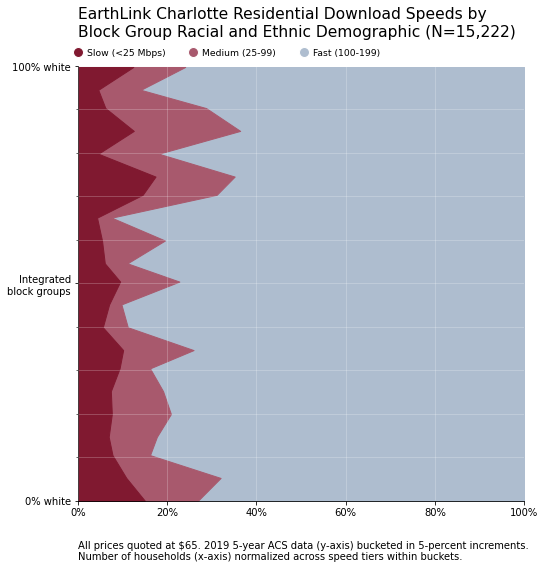

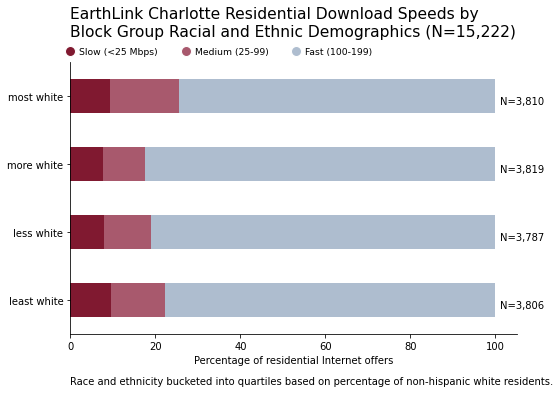

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


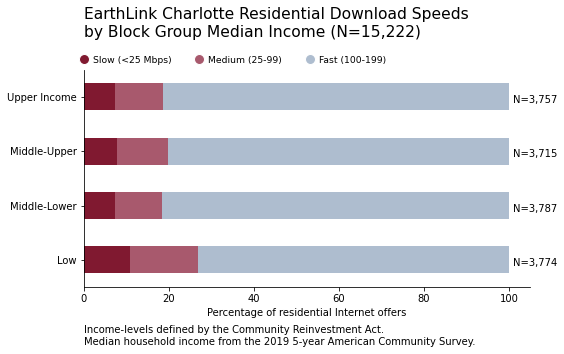

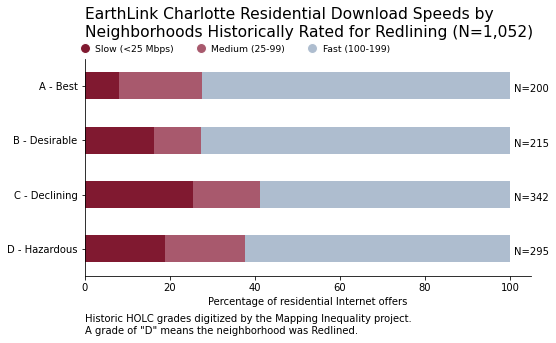

*******************************************************************************
chicago IL 27829 AT&T


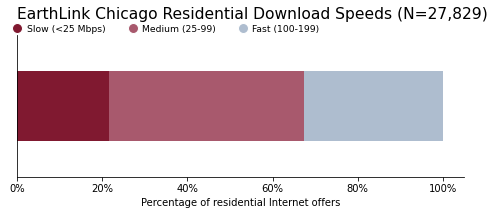

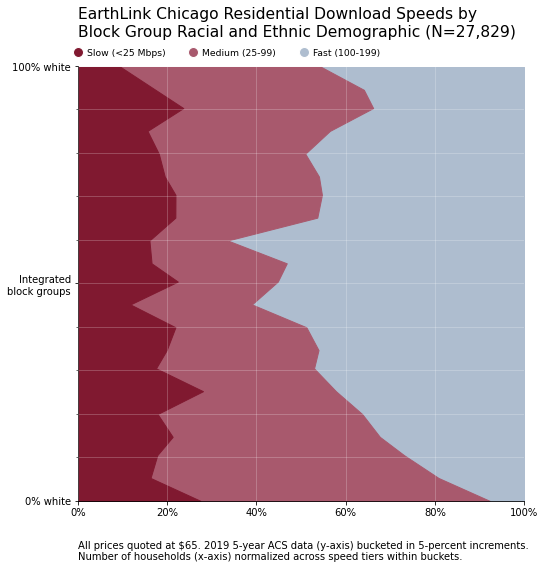

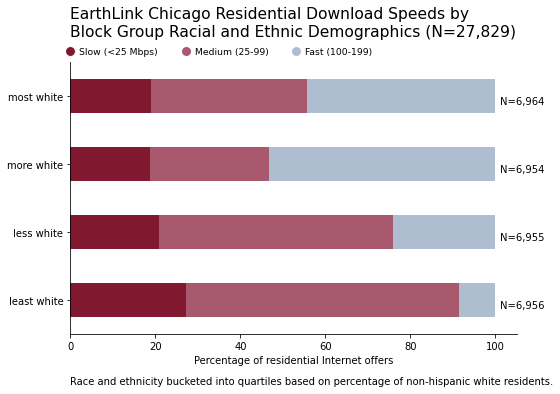

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


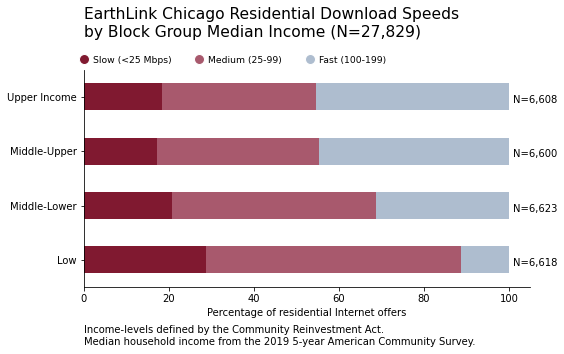

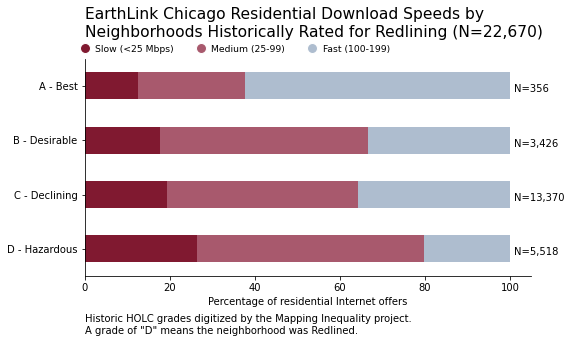

*******************************************************************************
columbus OH 22597 AT&T


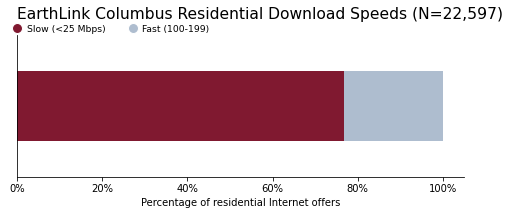

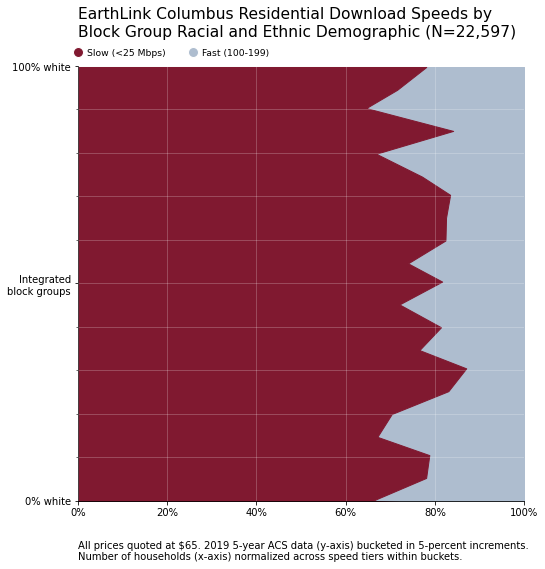

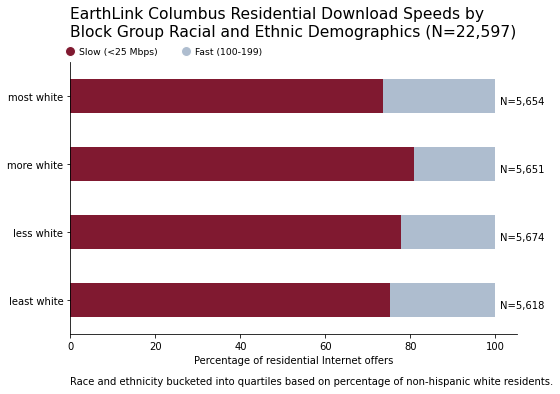

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


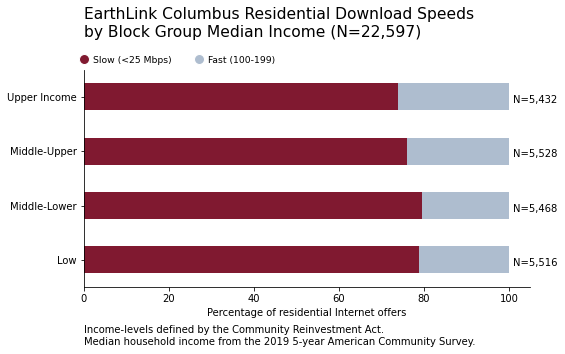

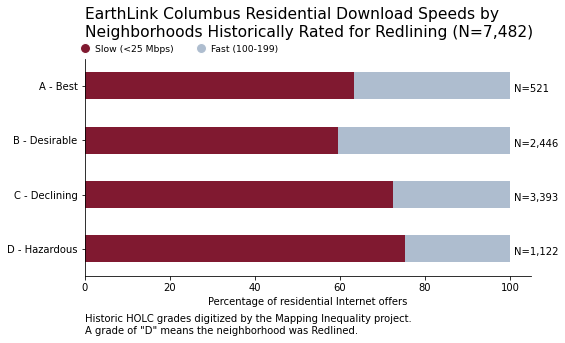

*******************************************************************************
detroit MI 19765 AT&T


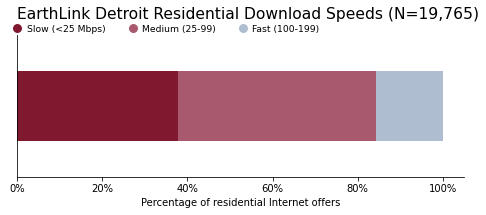

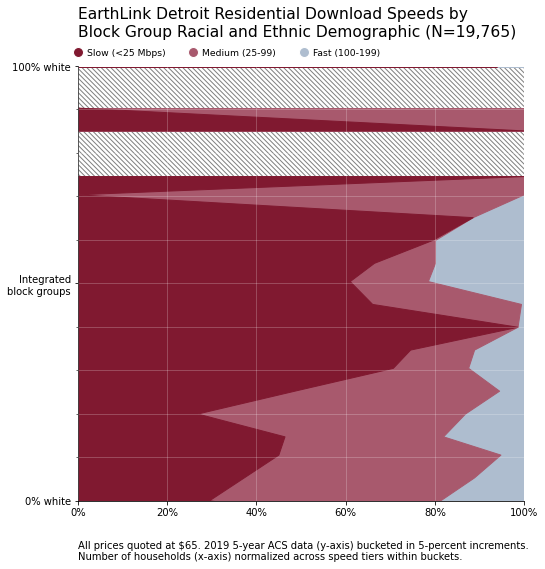

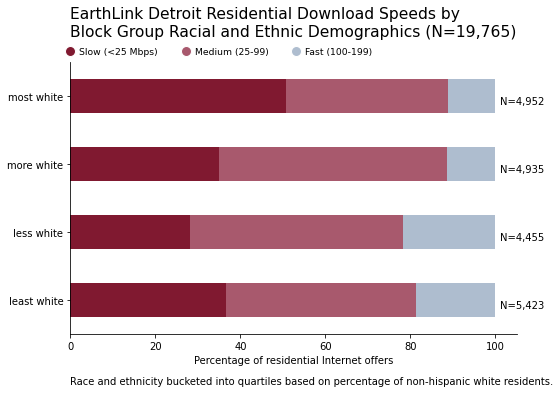

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


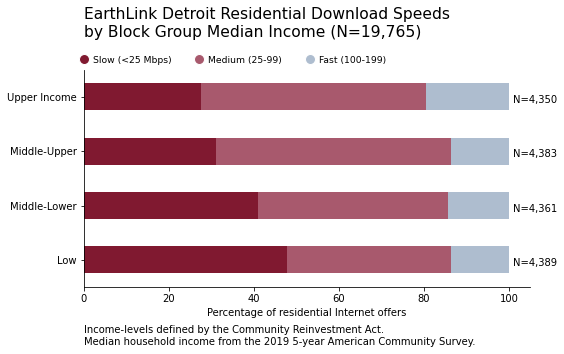

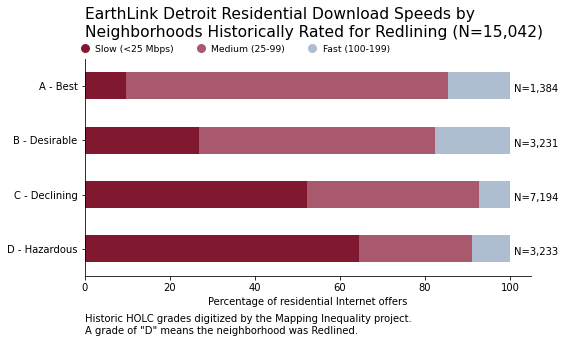

*******************************************************************************
houston TX 45981 AT&T


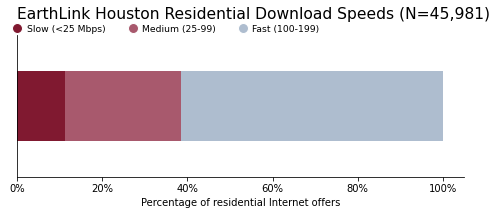

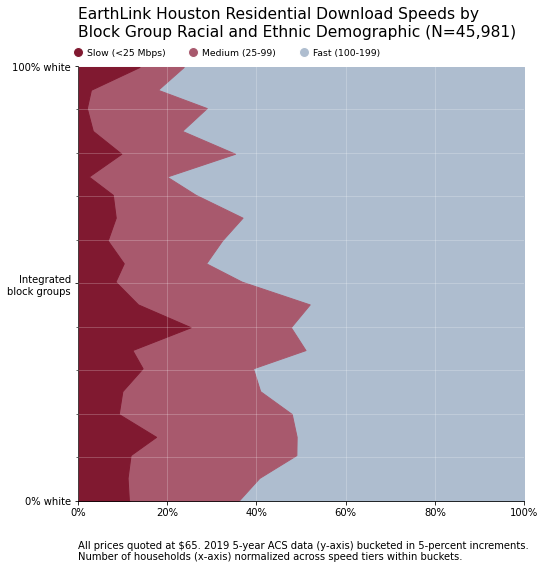

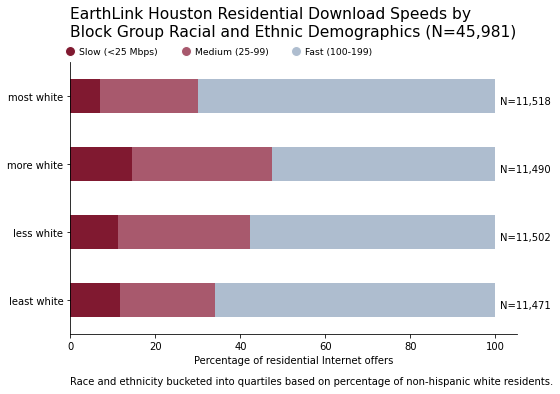

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


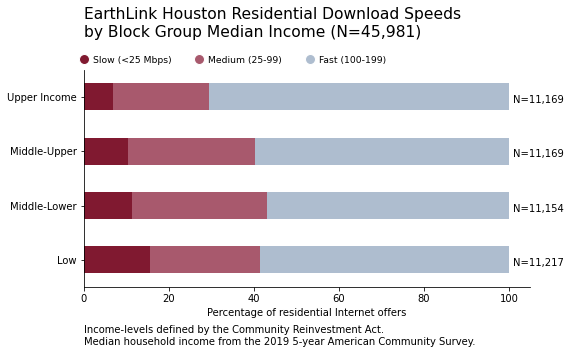

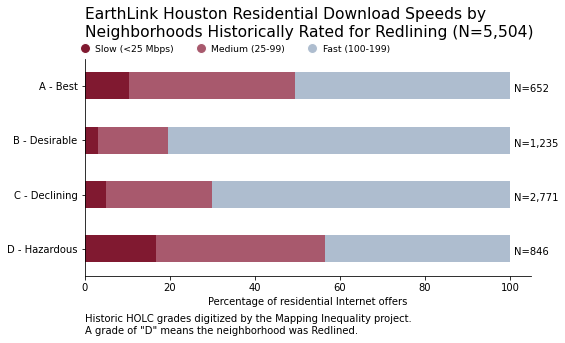

*******************************************************************************
huntsville AL 3789 AT&T


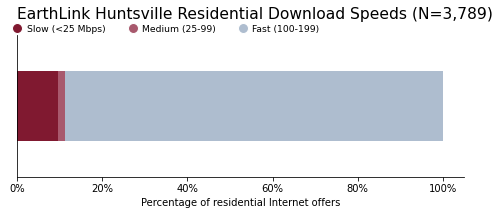

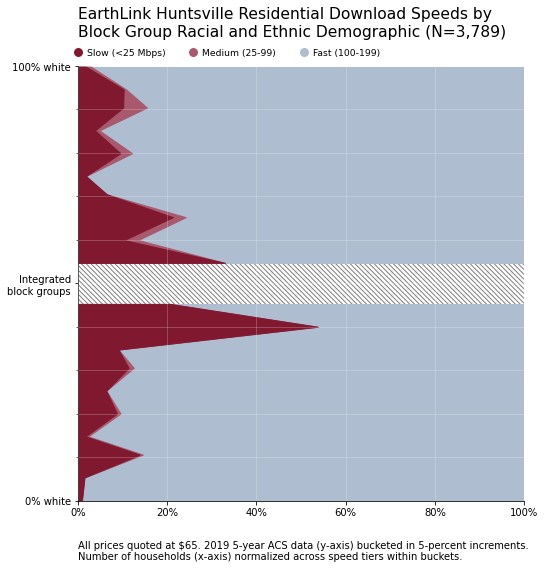

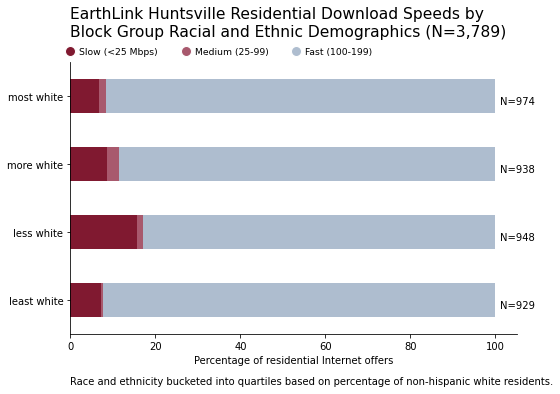

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


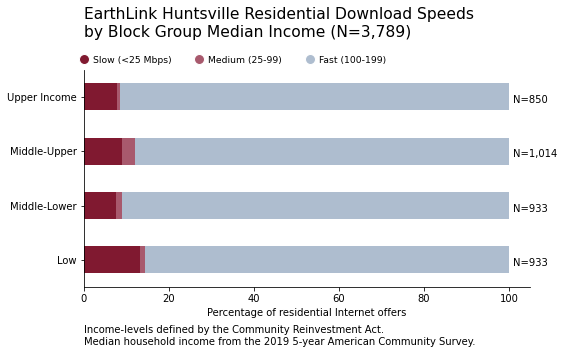

*******************************************************************************
indianapolis IN 10645 AT&T


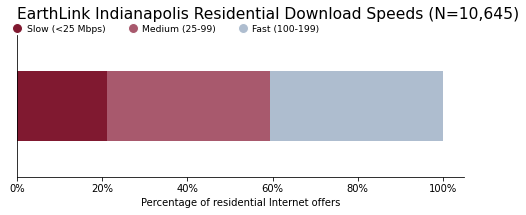

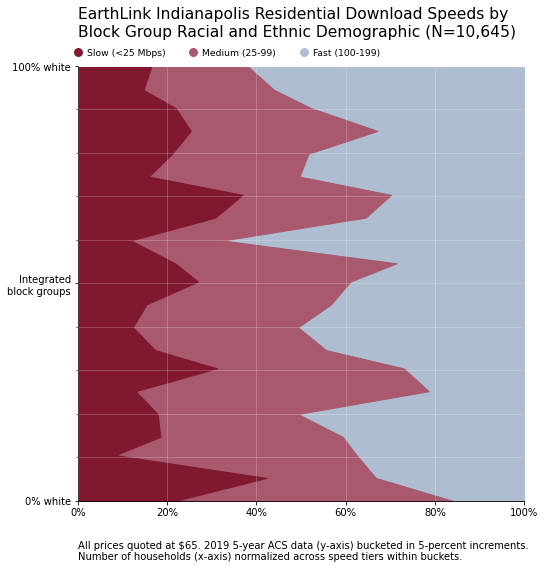

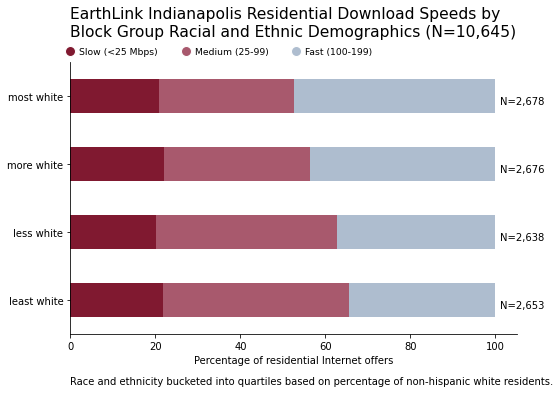

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


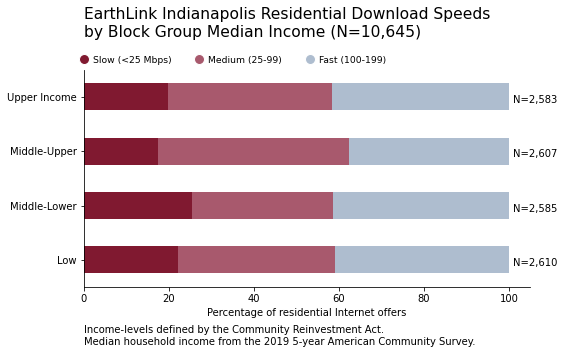

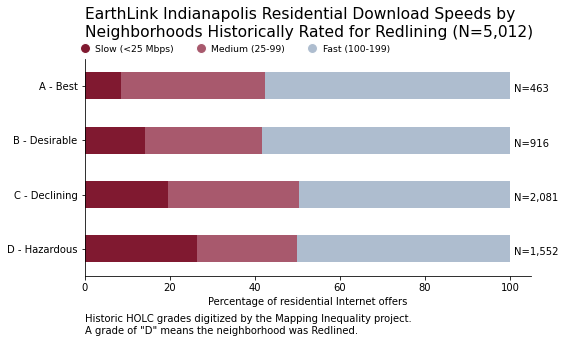

*******************************************************************************
jacksonville FL 18273 AT&T


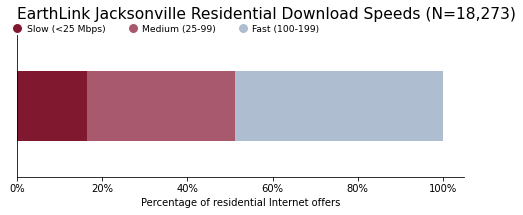

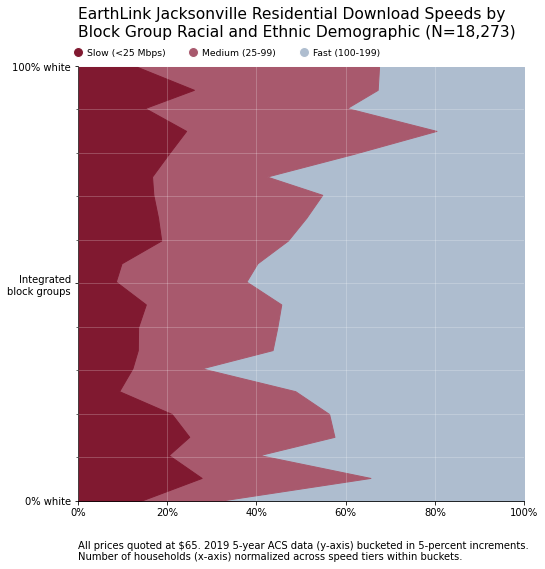

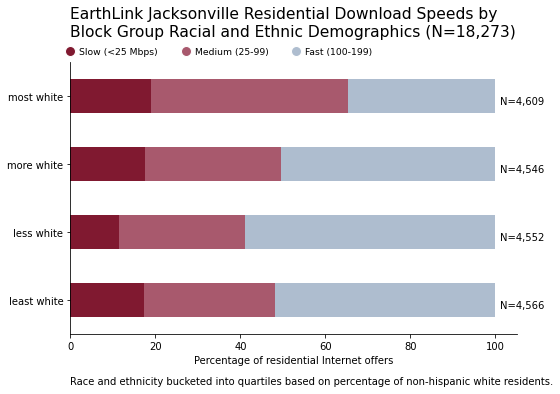

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


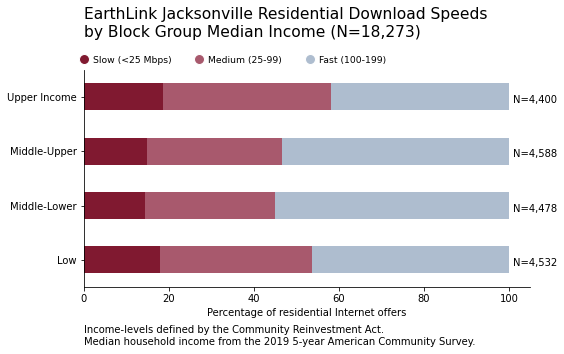

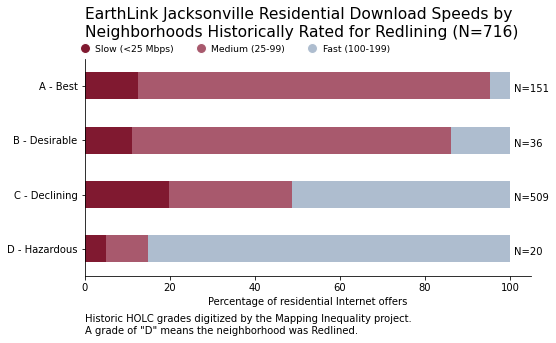

*******************************************************************************
kansas city MO 13405 AT&T


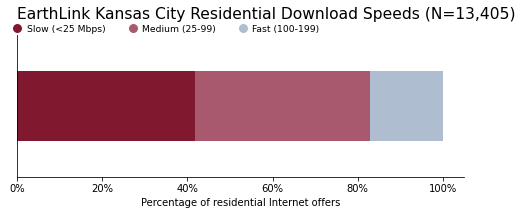

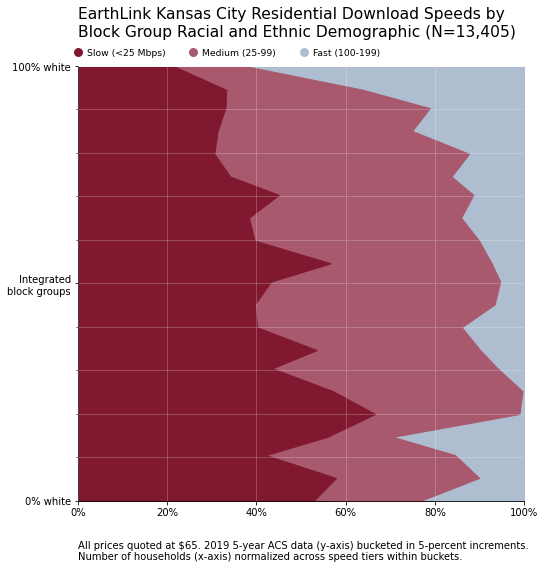

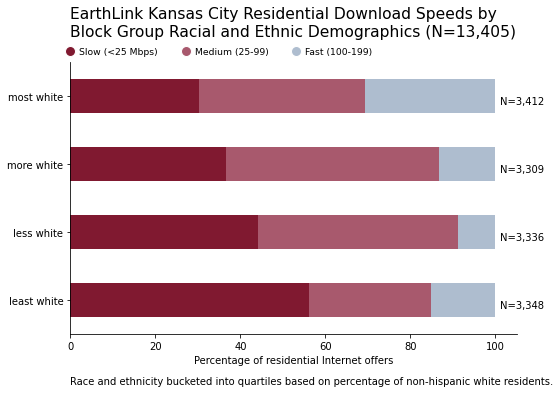

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


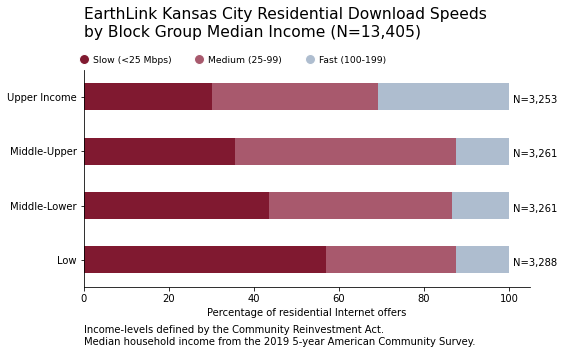

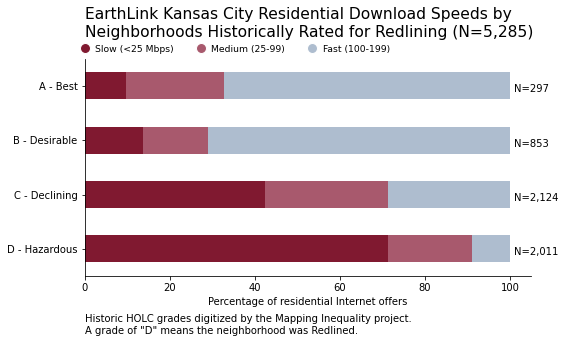

*******************************************************************************
little rock AR 5290 AT&T


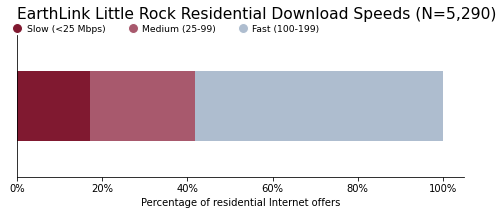

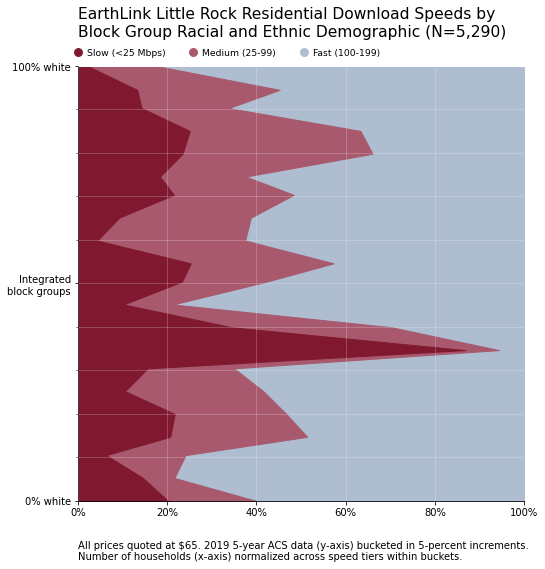

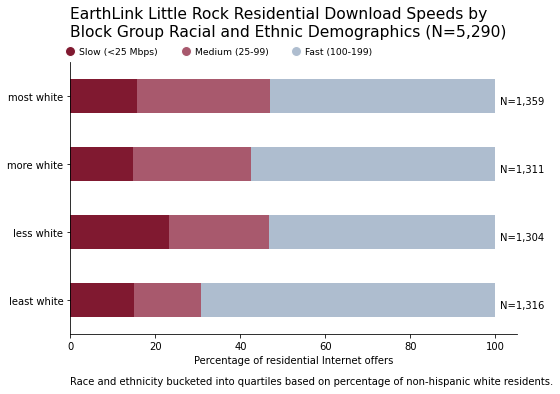

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


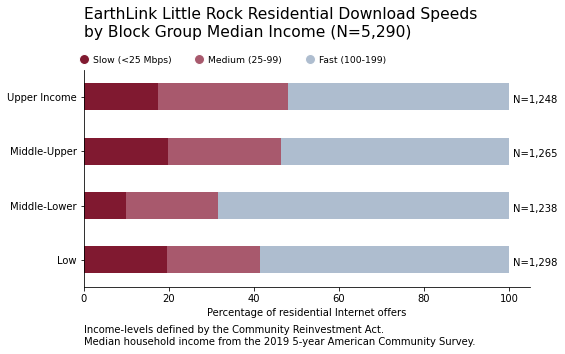

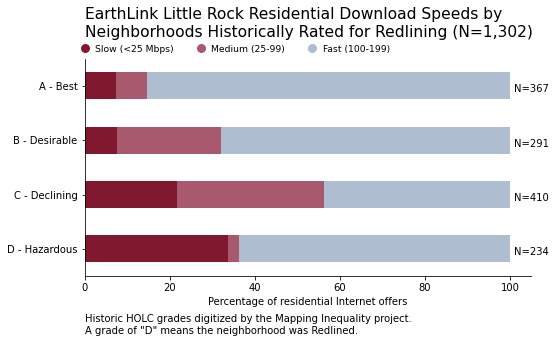

*******************************************************************************
los angeles CA 30510 AT&T


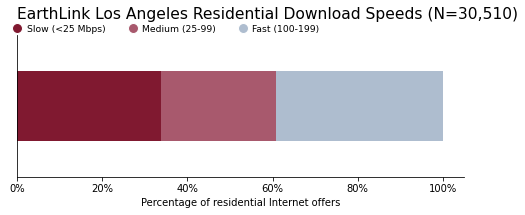

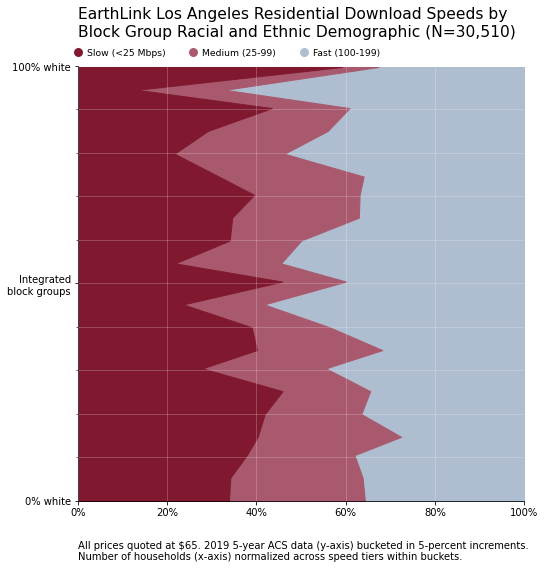

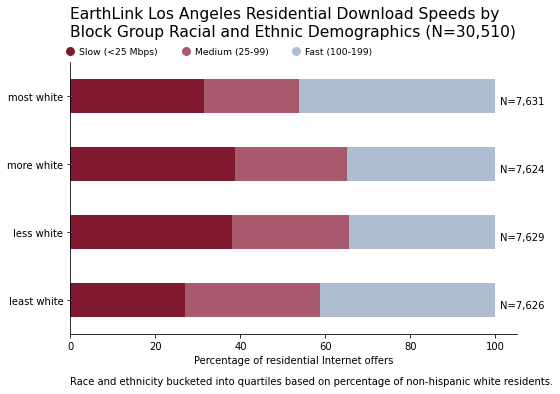

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


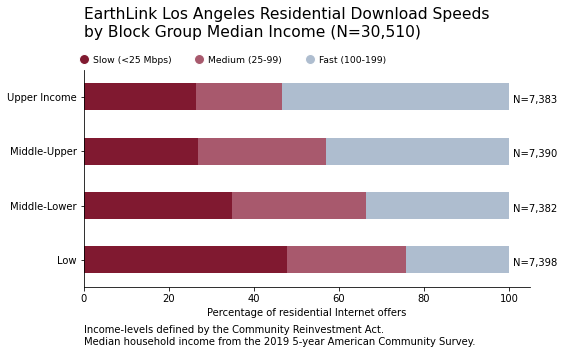

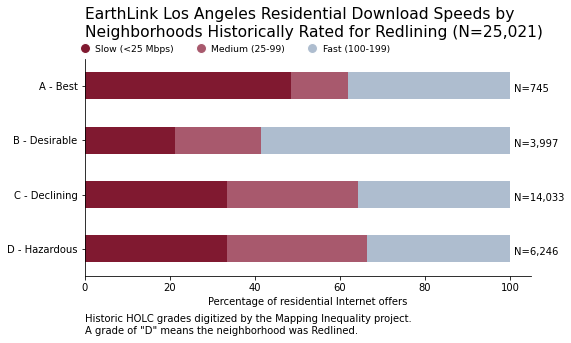

*******************************************************************************
louisville KY 7821 AT&T


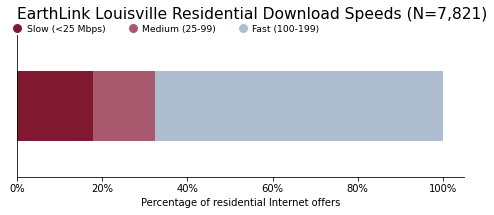

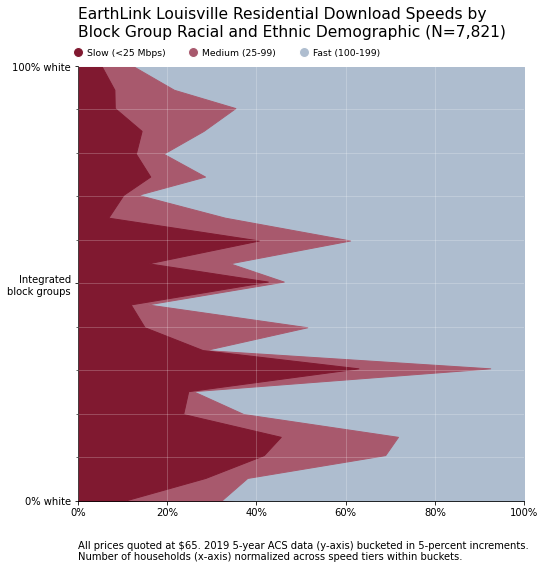

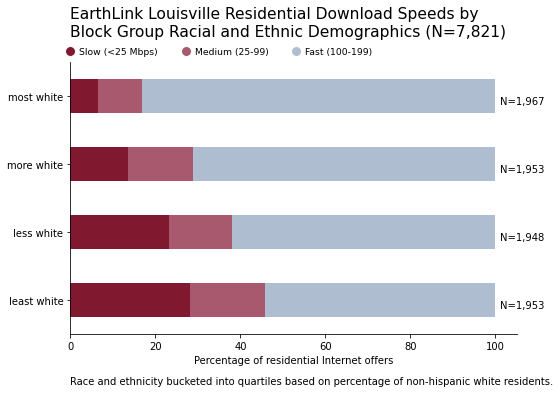

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


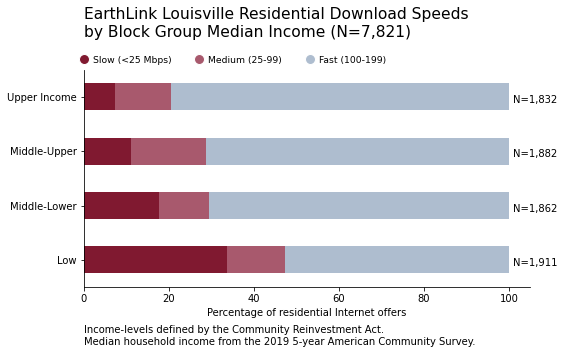

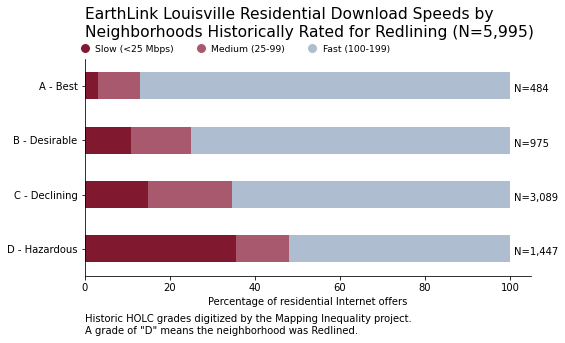

*******************************************************************************
milwaukee WI 13031 AT&T


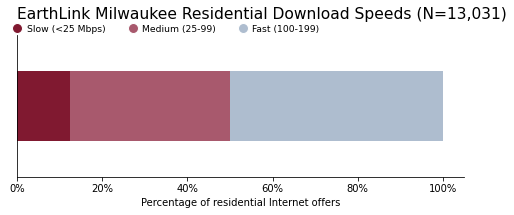

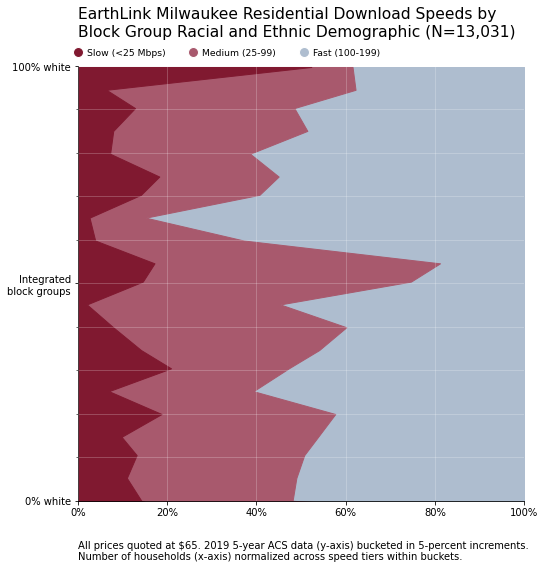

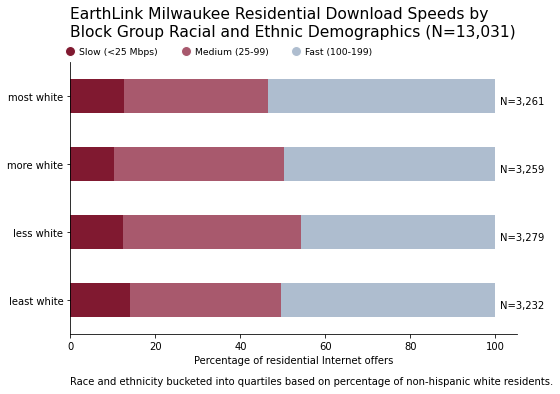

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


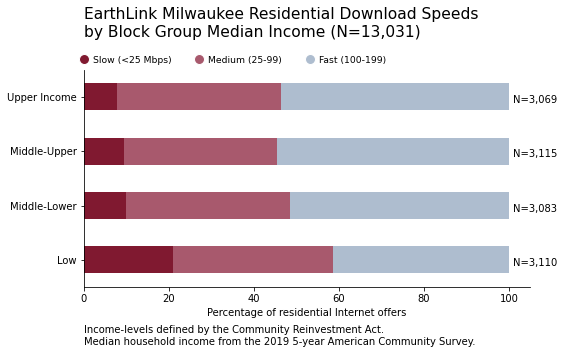

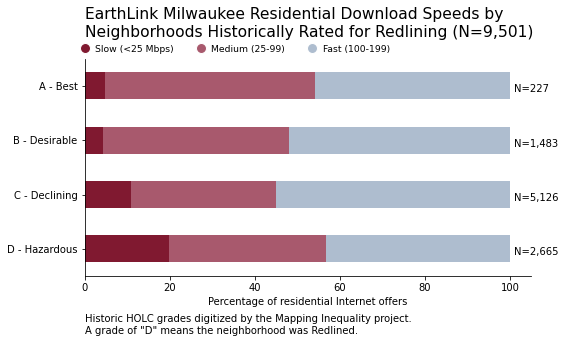

*******************************************************************************
nashville TN 8245 AT&T


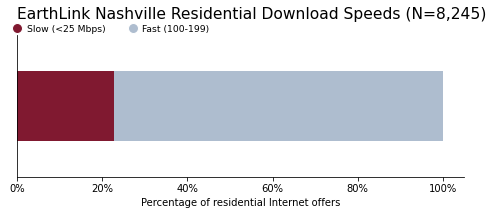

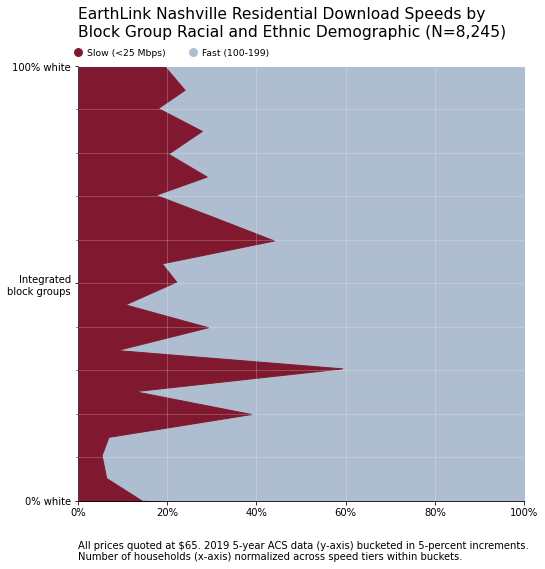

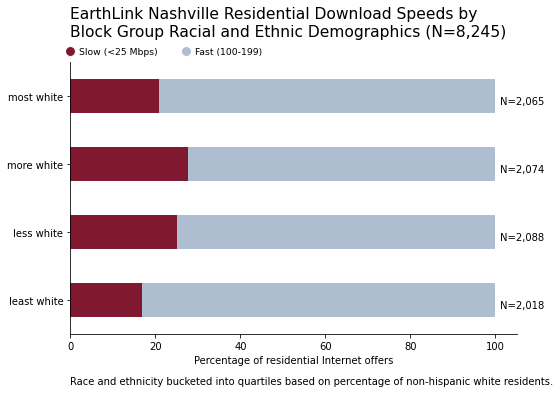

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


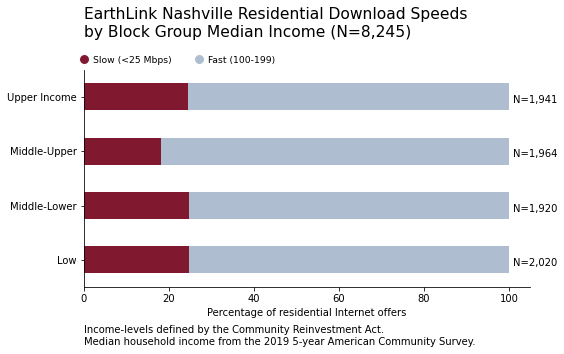

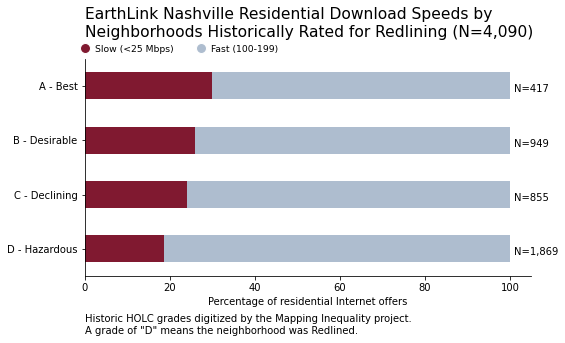

*******************************************************************************
new orleans LA 7370 AT&T


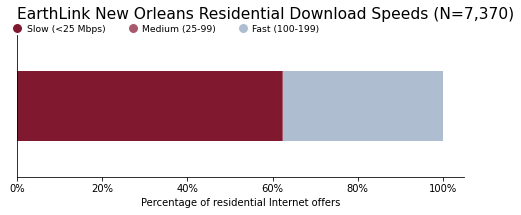

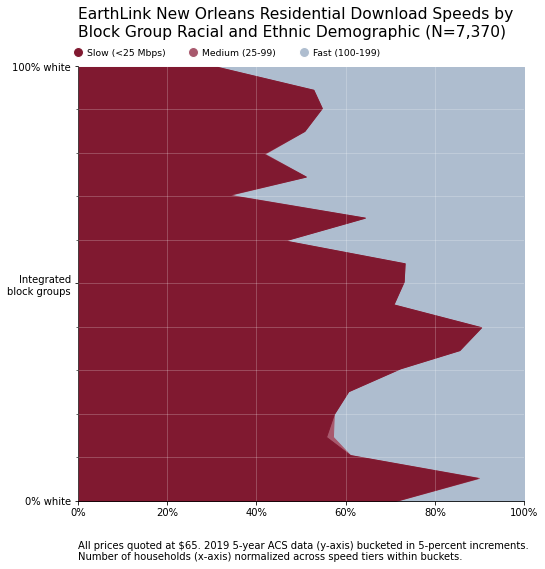

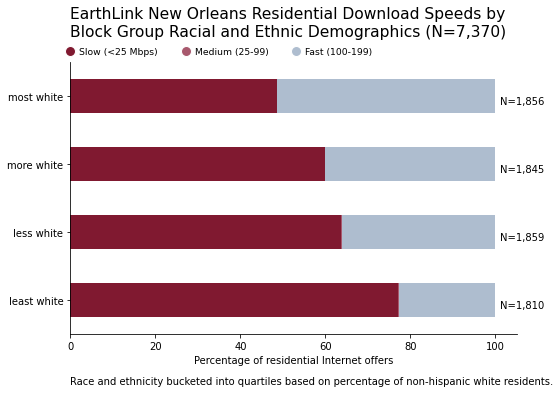

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


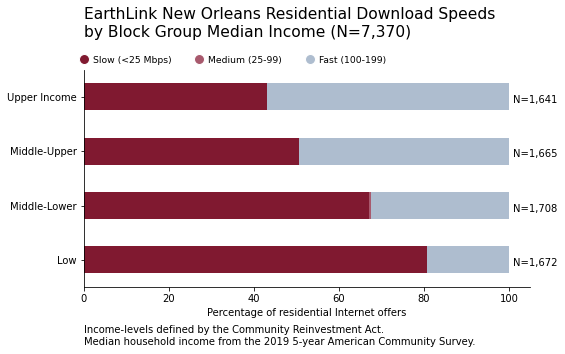

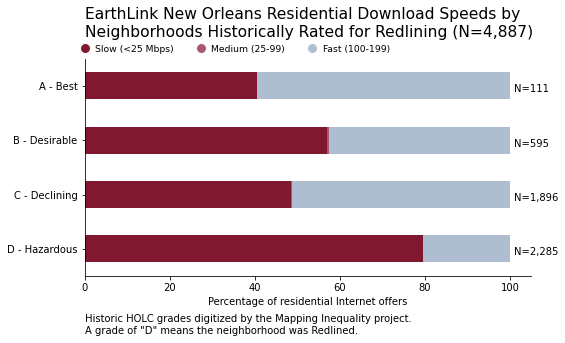

*******************************************************************************
oklahoma city OK 13654 AT&T


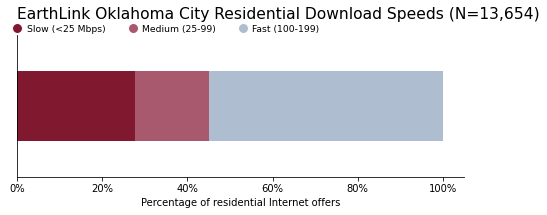

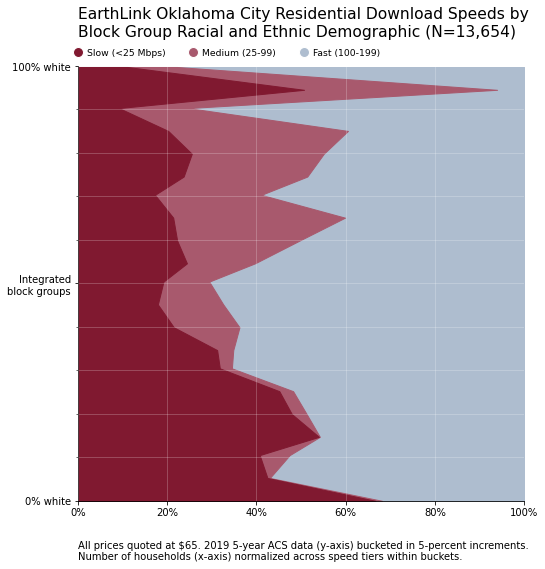

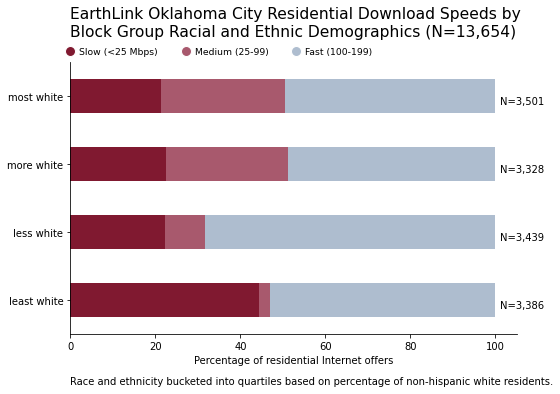

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


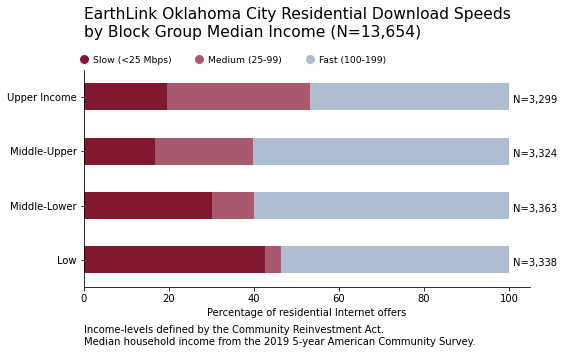

*******************************************************************************
wichita KS 10195 AT&T


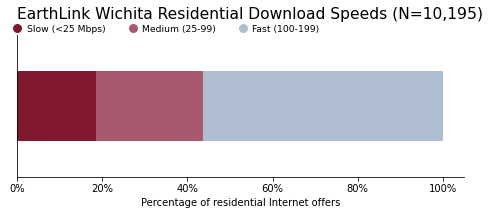

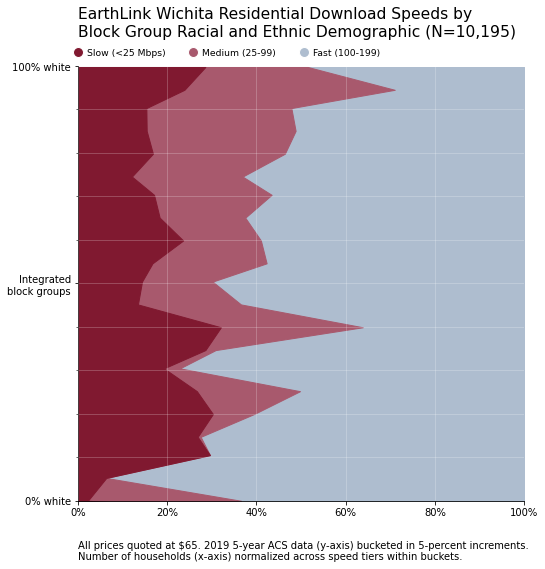

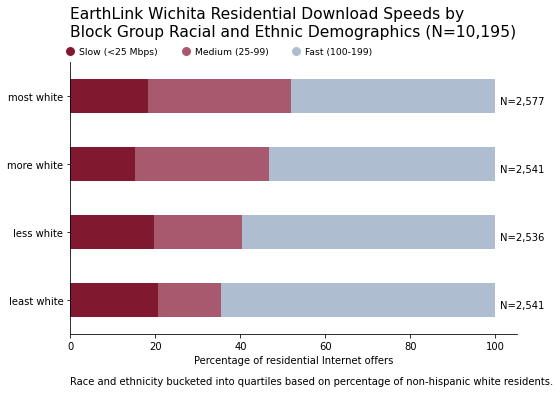

/home/chino/code/1_production-grade/isp/notebooks/aggregators.py:247: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'income_level'] = df['income_level'].astype(


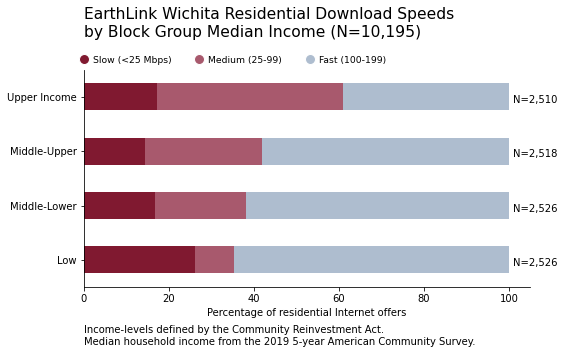

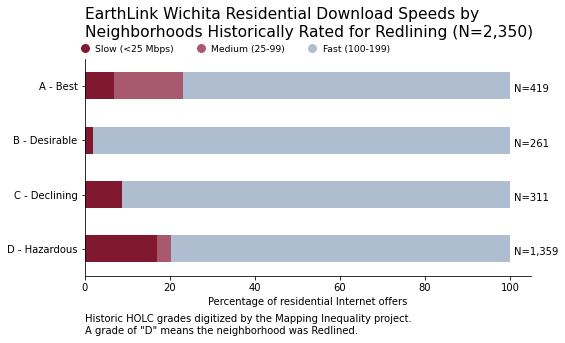

*******************************************************************************


In [28]:
for (city, state), _df in el.groupby(['major_city', 'state']):
    main_contractor = _df.contract_provider.value_counts().index[0]
    _df = bucket_and_bin(_df)
    print(city, state, len(_df), main_contractor)
    speed_breakdown(_df, location=city.title(), isp='EarthLink')
    plot_race(_df, location=city.title(), isp='EarthLink', price='$65')
    race(_df, location=city.title(), isp='EarthLink')
    income(_df, location=city.title(), isp='EarthLink')
    redlining(_df, location=city.title(), isp='EarthLink')
    print("*" * 79)